In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# para visualizar todas as colunas do dataframe 
pd.set_option('display.max_columns', 64)

In [4]:
# abrindo o dataframe, ele estara disponivel
dataset = pd.read_csv ('darknet_cocaine.csv')

In [5]:
dataset.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,vendor_link,vendor_name,successful_transactions,rating,ships_from,ships_to,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,ships_from_FR,ships_to_GB,ships_from_GB,ships_to_CA,ships_from_CA,ships_to_DE,ships_from_DE,ships_to_AU,ships_from_AU,ships_to_EU,ships_from_EU,ships_to_ES,ships_from_ES,ships_to_N. America,ships_from_N. America,ships_to_BE,ships_from_BE,ships_to_WW,ships_from_WW,ships_to_SI,ships_from_SI,ships_to_IT,ships_from_IT,ships_to_DK,ships_from_DK,ships_to_S. America,ships_from_S. America,ships_to_CH,ships_from_CH,ships_to_BR,ships_from_BR,ships_to_CZ,ships_from_CZ,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,Mister-Molly,90,4.63,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,Mister-Molly,90,4.63,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,0ldamsterdamm,620,4.94,NL,EU,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,lhomme-masquer,15,5.00,FR,EU,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,SMOOTHCRIMINAL007,28,4.78,NL,WW,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# criando um dataframe apenas com as colunas numericas 
dados = dataset.select_dtypes(include = ['int64', 'float64'])

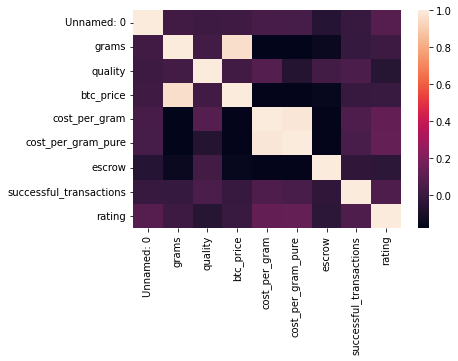

In [9]:
# grafico de calor, baseado na correlacao entre as variaveis, baseado em pearson 
sns.heatmap(dados.corr())
plt.show()

In [10]:
# a correlacao da grama e o preco e 96%, muito alta, iremos trabalhar com ela.
dados.corr()*100

,Unnamed: 0,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating
Unnamed: 0,100.000000,2.420822,1.373854,1.887120,4.676394,3.937989,-6.161493,-0.766791,8.807812
grams,2.420822,100.000000,3.069471,96.045112,-17.862821,-17.827344,-14.827622,-1.200642,0.928172
quality,1.373854,3.069471,100.000000,2.709645,8.254032,-6.490739,3.100850,5.375395,-5.519101
btc_price,1.887120,96.045112,2.709645,100.000000,-17.131799,-17.063567,-15.906702,-0.821316,0.053867
cost_per_gram,4.676394,-17.862821,8.254032,-17.131799,100.000000,98.578387,-17.005188,6.382165,12.197704
cost_per_gram_pure,3.937989,-17.827344,-6.490739,-17.063567,98.578387,100.000000,-17.062905,5.156406,12.691684
escrow,-6.161493,-14.827622,3.100850,-15.906702,-17.005188,-17.062905,100.000000,-2.952709,-3.739993
successful_transactions,-0.766791,-1.200642,5.375395,-0.821316,6.382165,5.156406,-2.952709,100.000000,6.243259
rating,8.807812,0.928172,-5.519101,0.053867,12.197704,12.691684,-3.739993,6.243259,100.000000


In [11]:
# definindo meus valoeres de x e de y
x = dataset.loc[:, 'grams'].values
y = dataset.loc[:, 'btc_price'].values

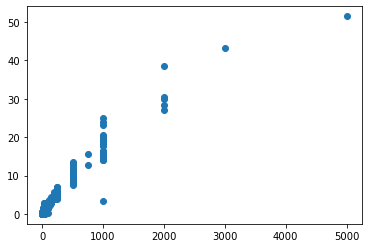

In [22]:
# visualizando os dados com o matplotlib
plt.scatter(x,y)
plt.show()

In [40]:
# visualizando os dados com o plotly
fig = px.scatter(x=x, y=y, width=900, height=500)
fig.update_traces(marker_size=6)
fig.show()

In [41]:
# dividindo os dados para treino e teste   
x_treino, x_teste , y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 3)

In [42]:
# modelo regressao polinomial, grau 2.

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_treino.reshape(-1,1))
# treinando o modelo 

polinomial_model=LinearRegression()
polinomial_model.fit(x_poly, y_treino)


LinearRegression()

In [45]:
# modelo regressao linear 
linear_model = LinearRegression()
linear_model.fit(x_treino.reshape(-1,1),y_treino)

LinearRegression()

In [47]:
# realizando as previsoes para o grafico, em cima dos dados de treino mesmo, apenas para ilustracao.
x_range = np.linspace(x_treino.min(), x_treino.max(), 100)
x_range_poly=poly.fit_transform(x_range.reshape(-1,1))

previsoes_poly = polinomial_model.predict(x_range_poly)
previsoes_linear = linear_model.predict(x_range.reshape(-1,1))


In [104]:
# 
fig = go.Figure([
    go.Scatter(x=x_treino.squeeze(), y=y_treino, name='treino', mode='markers',  opacity=0.7),
    go.Scatter(x=x_teste.squeeze(), y=y_teste, name='teste', mode='markers', opacity=0.7),
    go.Scatter(x=x_range, y=previsoes_poly, name='polinomial'),
    go.Scatter(x=x_range, y=previsoes_linear, name='linear')
    
    
])
fig.show()

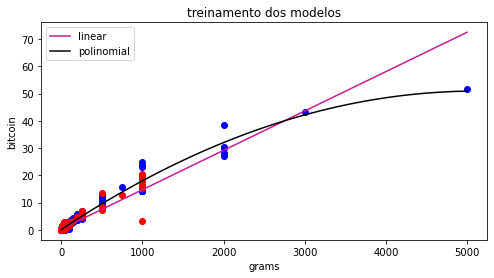

In [52]:

plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.scatter(x_treino, y_treino, color = 'b')
ax.scatter(x_teste, y_teste, color = 'r')
ax.plot(x_range, previsoes_linear , color = '#c71a93', label = 'linear')
ax.plot (x_range, previsoes_poly , color = 'k', label = 'polinomial')
plt.title('treinamento dos modelos')


ax.set_xlabel('grams')
ax.set_ylabel('bitcoin')

# ax.set_facecolor('#64edb9') --- para mudar a cor de fundo do grafico
ax.legend()
ax.axis('tight')

plt.show()

In [65]:
# avaliando o modelo linear com base no r2
linear_model.score(x_teste.reshape(-1,1), y_teste)*100

90.07975599355696

In [66]:
# avaliando o modelo polinomial com base no r2
x_teste_poly = poly.fit_transform(x_teste.reshape(-1,1))
polinomial_model.score(x_teste_poly, y_teste)*100

91.2487152339307

In [76]:
# a mesma avaliacao nos dados de treino:
linear_r2 = linear_model.score(x_treino.reshape(-1,1), y_treino)*100

x_treino_poly = poly.fit_transform(x_treino.reshape(-1,1))
poly_r2= polinomial_model.score(x_treino_poly, y_treino)*100


In [72]:
# perbeca que o modelo polinomial foi muito bem nos dados de treino, mas decaiu 7% para os dados de teste
# isso evidencia um pouco de overfiting, pode-se testar outros graus e algumas transformacoes para melhorar o desempenho dele 
print(linear_r2, poly_r2)

92.63492410565311 97.61948921065317


In [83]:
prev_linear = linear_model.predict(x_teste.reshape(-1,1))

prev_poly = polinomial_model.predict(x_teste_poly)

In [84]:
# Erro quadradico medio e absoluto do modelo linear
mae_linear = mean_absolute_error(y_teste, prev_linear)
mse_linear = mean_squared_error(y_teste, prev_linear)
print(f'MAE: {mae_linear}, MSE: {mse_linear}  ')

MAE: 0.3790532256356381, MSE: 0.7601101782573554  


In [85]:
# Erro quadradico medio e absoluto do modelo linear
mae_linear = mean_absolute_error(y_teste,prev_poly )
mse_linear = mean_squared_error(y_teste,prev_poly )
print(f'MAE: {mae_linear}, MSE: {mse_linear}  ')

MAE: 0.2169528072483204, MSE: 0.6705420369899653  


In [105]:
x_range = np.linspace(x.min(), x.max(), 100)
x_polinomio =poly.fit_transform(x_range.reshape(-1,1))
poly_prev_graph = polinomial_model.predict(x_polinomio)
linear_prev_graph = linear_model.predict(x_range.reshape(-1,1))
fig = px.scatter(dados, x='grams', y='btc_price', opacity=0.65)
fig.add_scatter
fig.add_traces(go.Scatter(x=x_range, y=poly_prev_graph, name='regressao polinomial'))
fig.update_traces(line_color='#ed64c8', selector=dict(type='scatter'))
fig.add_traces(go.Scatter(x=x_range, y=linear_prev_graph, name='regressao linear'))

fig.show()